<a href="https://colab.research.google.com/github/xalo1987/Proyecto_DataAnalysis/blob/main/RESNET50_torchvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# From torchvision.models
from torchvision import models
model = models.resnet50(pretrained=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:

!pip install timm
import timm

# from timm
pretrained_model_name = "resnet50"
model = timm.create_model(pretrained_model_name, pretrained=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

# Modifying model head

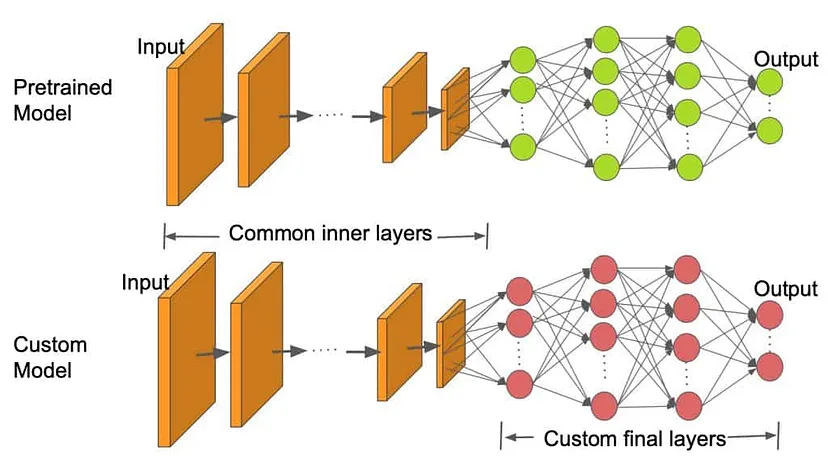

Modifying the model’s head is essential to align it with your specific target task. Pre-trained models are trained on large datasets like ImageNet for image classification or on text data like BooksCorpus and Wikipedia for text generation. By modifying the model’s head, the pre-trained model can adapt to the new task and utilise the valuable features it has learned, enhancing its performance in the new task.

## forma1

For example, you can modify RestNet head for classification task:

In [4]:
import torch.nn as nn
import timm

num_classes = 4 # Replace num_classes with the number of classes in your data

# Load pre-trained model from timm
model = timm.create_model('resnet50', pretrained=True)

# Modify the model head for fine-tuning
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

## forma2

Or you can modify RestNet head for classification task along with adding extra linear layers to enhance the model’s predictive power (ps — this is merely an illustrative example):

In [ ]:
import torch.nn as nn
import timm

num_classes = 4 # Replace num_classes with the number of classes in your data

# Load pre-trained model from timm
model = timm.create_model('resnet50', pretrained=True)

# Modify the model head for fine-tuning
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, num_classes)    # Final prediction fc layer
)

## forma3

In [ ]:
model = timm.create_model('resnet50', pretrained=True)

# Modify the model head for regression
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1) # Regression task has a single output

One thing to note that — the model does not always have a FC (fully connected) layer that we modify output features(e.g, num_classes). The architecture of models can vary, and the name and position of the layer we need to modify can differ.

In many pre-trained models, especially in convolutional neural network (CNN) architectures, there is often a linear layer or FC layer at the end of the model that performs the final classification. However, this is not a strict rule, and some models may have a different structure.

To identify the layer that needs modification, you can do, for example:

In [5]:
import torch
import timm

# Load pre-trained model from timm
model = timm.create_model('resnet50', pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

By printing the model, you can see its architecture and identify the appropriate layer to modify. Look for a linear or FC layer that serves as the final classification layer, and replace it with a new layer that matches the number of classes or your task requirement.

# Setting Optimizer, Learning Rate, Weight Decay, and Momentum

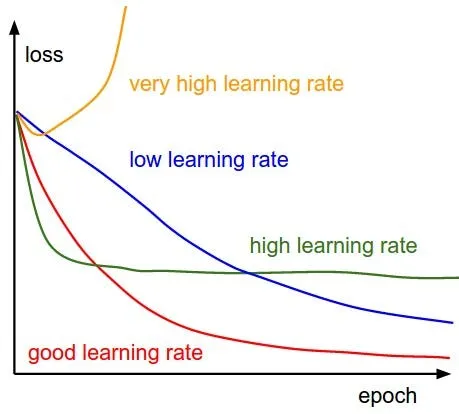

In fine-tuning, the learning rate, loss function, and optimizer are interrelated components that collectively influence the model’s ability to adapt to the new task while leveraging the knowledge acquired from pre-training. A well-chosen learning rate ensures effective model convergence at a reasonable speed, a carefully selected loss function aligns the loss minimization during training process with the target task, and an appropriate optimizer optimizes the model’s parameters effectively.

Fine-tuning demands careful experimentation and iterative adjustment of these components to strike the right balance and achieve the desired level of performance in the fine-tuned model.

## Optimizers

The optimizer determines the algorithm to be used to to update the model’s parameters based on the gradients computed during backpropagation. Different optimizers, such SGD, Adam, or RMSprop, have distinct paramters update rules and convergence properties. The choice of optimizer can significantly impact the model training and the final performance of the fine-tuned model. Selecting the most appropriate optimizer involves considering factors like the nature of the task, the size of the dataset, and the computational resources available.

## Learning Rate, Momentum and Weight Decay
While defining the optimizer we also have to set the learning rate(LR) which is a hyperparameter that determines the step size at each iteration during optimization. It controls how much the model’s parameters are updated in response to the calculated gradients during backpropagation. Choosing an appropriate learning rate is crucial, as setting it too high may cause the optimization process to oscillate or diverge or overshoot the optimal solution, while setting it too low may result in slow convergence or getting trapped in local minima.

In addition to the learning rate, there are other crucial hyperparameters to consider when defining the optimizer, such as weight decay and momentum (specific to SGD). Let’s take a quick look at both of these hyperparameters:

Weight decay, also known as L2 regularization, is a technique used to prevent overfitting and encourage the model to learn simpler, more generalizable representations.
Momentum is used in Stochastic Gradient Descent (SGD), to accelerate convergence and escape local minima.

In [6]:
import torch.optim as optim

# Define your optimizer with weight decay
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

# Define your optimizer with weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

## Choosing Loss functions

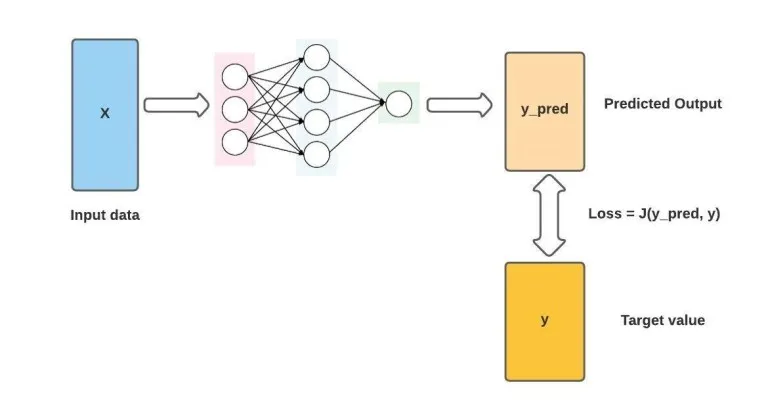

The loss function measures the difference or gap between the model’s predicted outputs and the actual correct answers. It gives us a way to understand how well the model is performing on the task. When fine-tuning a pre-trained model, it’s important to choose a loss function that suits the specific task we’re working on. For example, for classification tasks, cross-entropy loss is commonly used, while mean squared error is more suitable for regression problems. Selecting the right loss function ensures that the model focuses on optimizing the desired objective during training.

In [7]:
import torch.nn as nn

# Define the loss function - For classification problem
loss_function = nn.CrossEntropyLoss()

# Define the loss function - For regression problem
loss_function = nn.MSELoss()  # Mean Squared Error loss

Also to note that there several additional considerations and techniques that can be applied regarding the choice and handling of the loss function. Some example of such are :

Custom Loss function — You may need to modify or customize the loss function to suit specific requirements. One example is incorporating a 10x penalisation for misclassification on an important individual class. Below is an example code that demonstrates the implementation of custom loss to provide you with an idea of how it can be done :

In [8]:
import torch
import torch.nn.functional as F

class CustomLoss(torch.nn.Module):
    def __init__(self, class_weights):
        super(CustomLoss, self).__init__()
        self.class_weights = class_weights

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        weights = torch.ones_like(targets).float()
        for class_idx, weight in enumerate(self.class_weights):
            weights[targets == class_idx] = weight
        weighted_loss = ce_loss * weights
        return torch.mean(weighted_loss)

# Assuming you have a model and training data
model = YourModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# Assuming 5 classes so class_weights = [1.0, 1.0, 1.0, 1.0, 10.0]
criterion = CustomLoss(class_weights=[1.0, 1.0, 1.0, 1.0, 10.0])

# Inside the training loop
optimizer.zero_grad()
outputs = model(inputs)
loss = criterion(outputs, targets)
loss.backward()
optimizer.step()

NameError: name 'YourModel' is not defined

Metric-Based Loss — In some cases, the performance of the model might be evaluated based on metrics other than the loss itself. In such cases, you can design or adapt the loss function to directly optimize for these metrics.
Regularization — Regularization methods, such as L1 or L2 regularization, can be incorporated into the loss function during fine-tuning to prevent overfitting and improve model generalization. Regularization terms can help control the complexity of the model and reduce the risk of overemphasising specific patterns or features in the data. L2 regularization can be applied by setting the weight_decay value in the optimizer, while L1 regularization requires a slightly different approach.
L2 regularization implementation :

In [ ]:
# Define a loss function
criterion = nn.CrossEntropyLoss()

# L2 regularization
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

L1 Regularization implementation :

In [ ]:
# Define a loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Inside the training loop
optimizer.zero_grad()
outputs = model(inputs)
loss = criterion(outputs, targets)

# L1 regularization
regularization_loss = 0.0
for param in model.parameters():
    regularization_loss += torch.norm(param, 1)
loss += 0.01 * regularization_loss#Adjust regularization strength as needed

## Freezing Full or Partial network


When we’re referring to freezing that means fixing the weight of specific layer or entire network during fine tuning process. Netwrok freezing allows us to retain the knowledge captured by the pre-trained model while only updating certain layers to adapt to the target task. So it’s very crucial and this should not be ignored if you’re fine tuning a pre-trained model.

Deciding whether you should freeze all the layers(full network) or partial layers of the pre-trained model before fine tuning it all boils down to your specific target task.

For example, if the pre-trained model has been trained on a large-scale dataset similar to the target task, freezing the entire network can help preserve the learned representations, preventing them from being overwritten. In this case, only the model’s head is modified and trained from scratch.

On the other hand, freezing only a portion of the network can be useful when the pre-trained model’s lower layers capture general features that are likely to be relevant for the new task. By freezing these lower layers, we can leverage the pre-trained model’s knowledge while updating the higher layers to specialize in the task-specific features. This approach is particularly useful in scenarios where the target dataset is small or significantly different from the dataset on which the pre-trained model was trained.

To implement freezing in PyTorch, you can access individual layers or modules within the model and set their requires_grad attribute to False. This prevents the gradients from being computed and the weights from being updated during the backward pass.

Below is an example code that demonstrates the implementation of freezing entire network :

In [ ]:
# Freeze all the layers of the pre-trained model
for param in model.parameters():
    param.requires_grad = False

# Modify the model's head for a new task
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

Freezing only convolutional layers in the network :

In [ ]:
# Freeze only the convolutional layers of the pre-trained model
for param in model.parameters():
    if isinstance(param, nn.Conv2d):
        param.requires_grad = False

# Modify the model's head for a new task
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

Freezing only specific layers in the network :

In [ ]:
# Freeze specific layers (e.g.,the first two convolutional layers) of the pre-trained model
for name, param in model.named_parameters():
    if 'conv1' in name or 'layer1' in name:
        param.requires_grad = False

# Modify the model's head for a new task
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

It’s important to note that freezing layers should be done thoughtfully, considering the specific requirements of your task and dataset. It’s a delicate balance between leveraging the pre-trained knowledge and allowing the model to adapt to the new task effectively.

## Define Model Floating-point precision

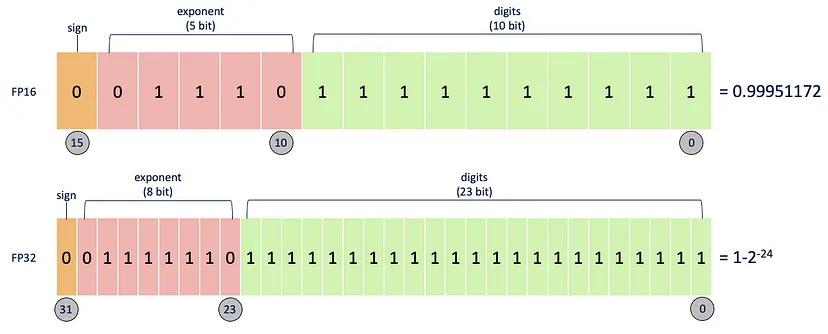

To quickly sum up the definition model floating point precision refers to the data type used to represent numerical values during computation in deep learning model. In PyTroch 32-bit (float32 or FP32) and 16-bit (float16 or FP16 or Half precision) are two commonly used floating-point precision.

1. float32 — This precision provides a wide dynamic range and high numerical precision, allowing for accurate computations but consuming more memory. FP32 uses 32 bits to represent a number.
float16 — This lower precision can reduce the memory footprint and computational requirements of the model, leading to potential gains in efficiency and speed. However, it may result in a loss of numerical precision and can impact the model’s accuracy or convergence. FP16 uses 16 bits to represent a number.
2. FP16 and FP32 are referred as Single Precision and both comes with it’s own set of pros and cons as we saw in above pointers. To leverage advantages of both we have Mixed Precision which combines FP16 and FP32 floating point precision within training pipeline. Mixed precision offers improved computational efficiency, reduced memory footprint, accelerated training, and increased model capacity.

Here’s an example of how to implement mixed precision training in a PyTorch training pipeline using the Automatic Mixed Precision (AMP) library:

In [ ]:
import torch
from torch import nn, optim
from torch.cuda.amp import autocast, GradScaler

# Define your model and optimizer
model = YourModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define scaler for automatic scaling of gradients
scaler = GradScaler()

# Define your training loop
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Enable autocasting for mixed precision
        with autocast():
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, targets)

        # Perform backward pass and gradient scaling
        scaler.scale(loss).backward()

        # Update model parameters
        scaler.step(optimizer)
        scaler.update()

        # Print training progress
        if batch_idx % log_interval == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Batch {batch_idx}/{len(train_loader)} | Loss: {loss.item():.4f}")

In the above example the GradScaler() object is used to perform gradient scaling. Here's a breakdown of the methods used:

1. scaler.scale(loss): This method scales the loss value by the appropriate factor determined by the scaler. It returns a scaled loss that will be used for the backward pass.
2. scaler.step(optimizer): This method updates the optimizer's parameters using the gradients calculated during the backward pass. It performs an optimizer step as usual but takes into account the gradient scaling performed by the scaler.
3. scaler.update(): This method adjusts the scale factor used by the scaler for the next iteration. It helps prevent underflow or overflow issues by dynamically adjusting the scale based on the gradients magnitude. It is called after scaler.step(optimizer).
4. The purpose of using GradScaler() and the associated methods is to mitigate potential numerical instability issues that may arise when using lower-precision (FP16) computations. By scaling the loss and gradients appropriately, the scaler ensures that the optimizer's updates remain in a stable range.

This implementation of mixed precision training with PyTorch’s AMP library allows for efficient utilization of FP16 computations for improved training speed and reduced memory usage, while maintaining the necessary precision for accurate weight updates using FP32.

The potential harms of using mixed precision training include:

Loss of Numerical Precision because of FP16 and this loss of precision may lead to reduced model accuracy, particularly in tasks that require high precision. Mixed precision might not be suitable when it comes to numerical precision-critical tasks.
Increased Vulnerability to Underflow and Overflow because of numerical instability during training which could affect the convergence and performance of the model.
Increased Complexity because of mixed precision which requires additional considerations, such as managing precision transitions, scaling gradients, and handling possible issues related to precision mismatch.
If your model suffers from severe gradient explosion or vanishing problems, switching to lower-precision computations (FP16) in mixed precision training may worsen these issues. In such cases, it’s crucial to address the underlying instability problems before considering mixed precision training.

## Training and Validation Mode

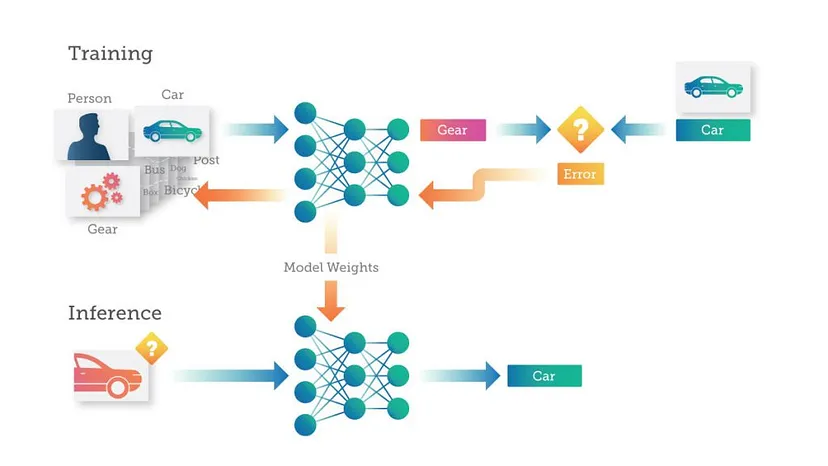

When fine-tuning a model, it is initially in training mode by default after loading a pre-trained model. However, we can switch the model to validation mode during inference or validation. These mode changes alter the model’s behaviour accordingly.

### Training mode
When the model is in training mode, it enables specific operations that are required during the training process, such as computing gradients, updating parameters, and applying regularization techniques like dropout. In this mode, the model behaves as if it is being trained on a training dataset and is ready to learn from the data.

In [9]:
model.train() # sets model in training mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

### Validation mode
When the model is in evaluation mode, it disables certain operations that are only necessary during training, such as computing gradients, dropout, and updating parameters. This mode is typically used during validation or testing when you want to assess the model’s performance on unseen data.

In [ ]:
model.val() # sets model in validation mode

# Single GPU and Multi GPU

GPUs are essential for deep learning and fine-tuning tasks because they excel at performing highly parallel computations, which significantly speed up the training process. In cases where you have access to multiple GPUs, you can leverage their collective power to further accelerate training. Here’s an example of how to utilize multiple GPUs if you have them available:

In [ ]:
# Define your model
model = MyModel()
model = model.to(device)  # Move the model to the desired device (CPU or GPU)

# Check if multiple GPUs are available
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs for training.")
    model = nn.DataParallel(model)  # Wrap the model with DataParallel

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)